In [33]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt 
%matplotlib inline

In [34]:
telco_based_data = pd.read_csv('C:\\Users\\thapa\\OneDrive\\Desktop\\EDA-with-Satyajit-Pattnaik\\Data\\Churn_Modelling.csv')

In [35]:
telco_based_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Univariate Analysis

In [36]:
telco_new = telco_based_data[['Geography', 'Gender', 'Exited']]

In [37]:
telco_new.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [38]:
telco_new.Exited.value_counts() / len(telco_new) * 100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

In [39]:
telco_new.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


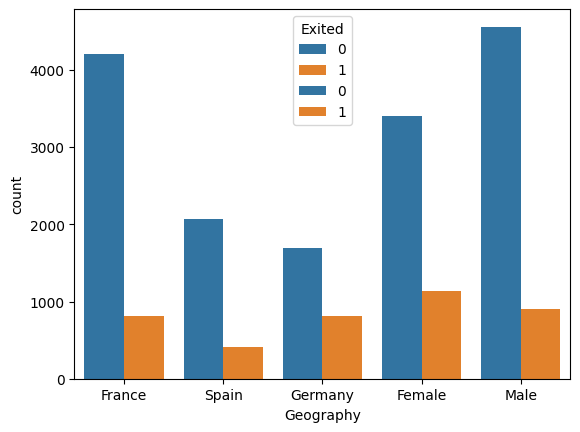

In [40]:
for i, predictor in enumerate(telco_new.drop(columns=['Exited'])):
    plt.Figure()
    sns.countplot(data = telco_new, x= predictor, hue= 'Exited')

## Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Count'>

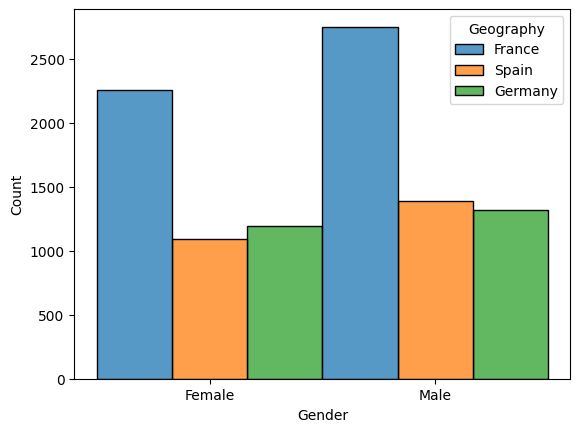

In [41]:
sns.histplot(x='Gender', hue= 'Geography', data=telco_new, stat = 'count', multiple='dodge')

In [42]:
telco_new_target1 = telco_new.loc[telco_new["Exited"]==1]

<Axes: xlabel='Gender', ylabel='Count'>

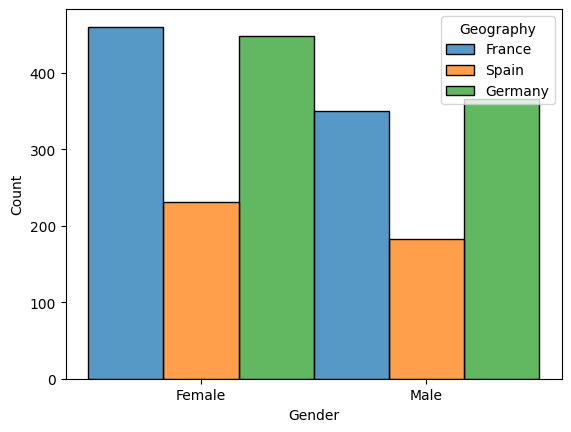

In [43]:
sns.histplot(x='Gender', hue= 'Geography', data=telco_new_target1, stat = 'count', multiple='dodge')

## Numerical Analysis

Correlation: It ranges from -1 to +1
- '+' = +ve correlation
- '-' = -ve coorelation
- 0 = zero correlation

In [44]:
telco_based_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
telco_based_data1 = telco_based_data.drop(['Surname','Geography','Gender'], axis=1)
telco_based_data1.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

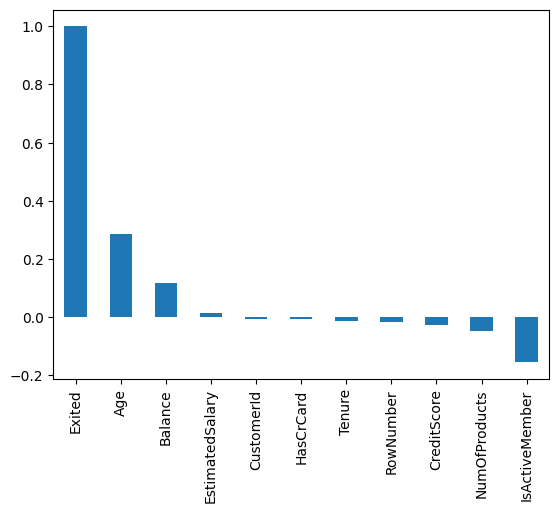

In [46]:
plt.Figure(figsize=(20,8))
telco_based_data1.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

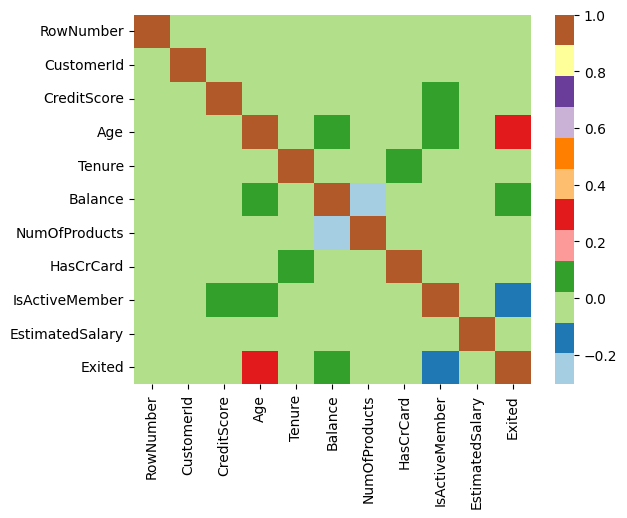

In [47]:
# Hitmap
plt.Figure(figsize=(8,8))
sns.heatmap(telco_based_data1.corr(), cmap='Paired')


In [48]:
telco_based_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Age'>

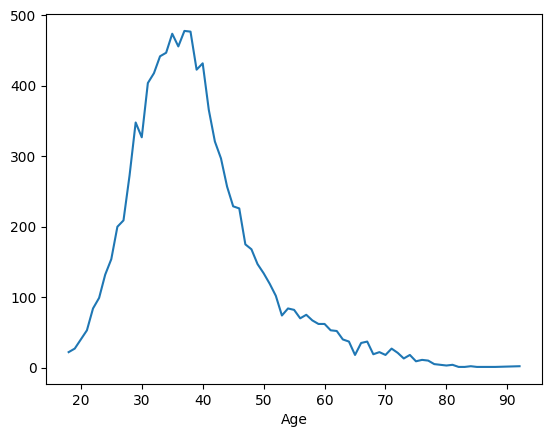

In [52]:
telco_based_data['Age'].value_counts().sort_index(ascending=True).plot()

In [53]:
telco_base_data1 = telco_based_data.loc[telco_based_data["Exited"]==1]

<Axes: xlabel='Age'>

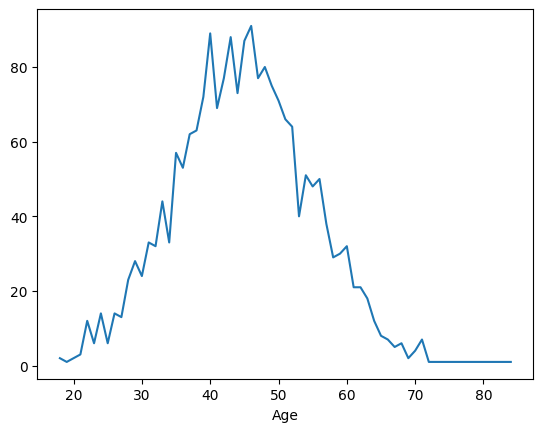

In [54]:
telco_base_data1['Age'].value_counts().sort_index(ascending=True).plot()

Text(0.5, 1.0, 'Age by churn')

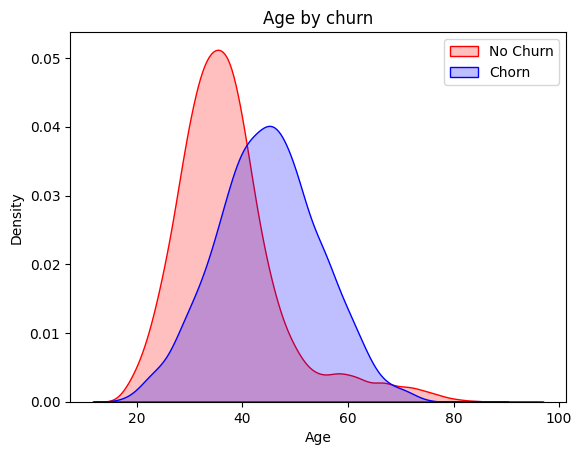

In [59]:
Tot = sns.kdeplot(telco_based_data.Age[(telco_based_data["Exited"]==0)], color='Red', fill=  True)
Tot = sns.kdeplot(telco_based_data.Age[(telco_based_data["Exited"]==1)], color='Blue', fill = True)
Tot.legend(['No Churn', 'Chorn'])
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')


Text(0.5, 1.0, 'Balance by churn')

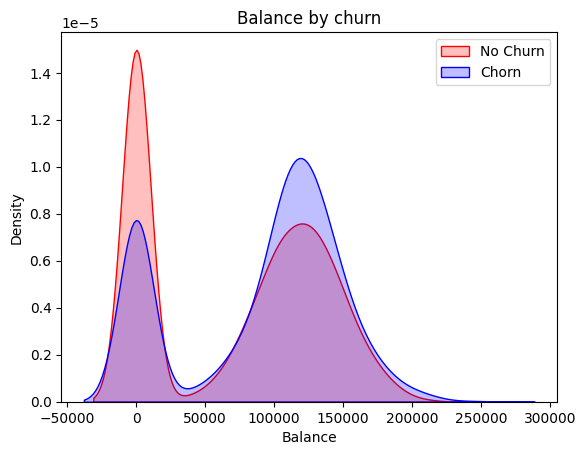

In [60]:
Tot = sns.kdeplot(telco_based_data.Balance[(telco_based_data["Exited"]==0)], color='Red', fill=  True)
Tot = sns.kdeplot(telco_based_data.Balance[(telco_based_data["Exited"]==1)], color='Blue', fill = True)
Tot.legend(['No Churn', 'Chorn'])
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title('Balance by churn')
